In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
conc = pd.read_excel('Downloads/Concrete_Data.xls')

In [4]:
conc

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90,47.029847
6,380.0,95.0,0.0,228.0,0.0,932.0,594.0,365,43.698299
7,380.0,95.0,0.0,228.0,0.0,932.0,594.0,28,36.447770
8,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.854291
9,475.0,0.0,0.0,228.0,0.0,932.0,594.0,28,39.289790


In [5]:
conc.describe()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


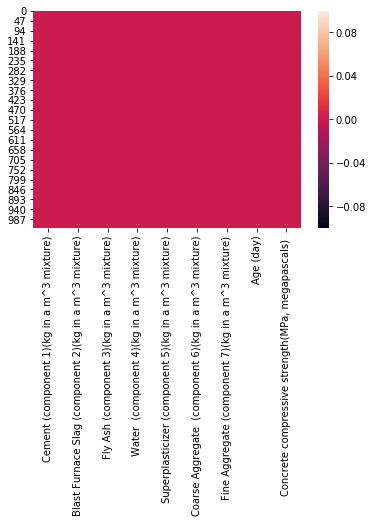

In [6]:
sns.heatmap(conc.isnull())

In [7]:
df  = pd.DataFrame(conc)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
Cement (component 1)(kg in a m^3 mixture)                1030 non-null float64
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    1030 non-null float64
Fly Ash (component 3)(kg in a m^3 mixture)               1030 non-null float64
Water  (component 4)(kg in a m^3 mixture)                1030 non-null float64
Superplasticizer (component 5)(kg in a m^3 mixture)      1030 non-null float64
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     1030 non-null float64
Fine Aggregate (component 7)(kg in a m^3 mixture)        1030 non-null float64
Age (day)                                                1030 non-null int64
Concrete compressive strength(MPa, megapascals)          1030 non-null float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


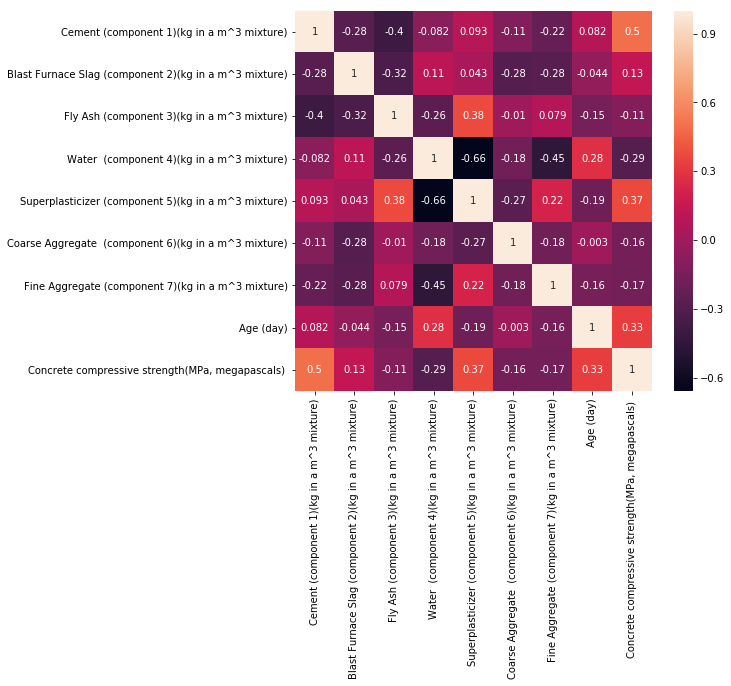

In [9]:
corr_hmap = df.corr()
plt.figure(figsize=(8,7))
sns.heatmap(corr_hmap,annot=True)

### before removing outliers

In [10]:
x=df.iloc[:,:-1]
x.shape

(1030, 8)

In [11]:
y=df.iloc[:,-1]
y.shape

(1030,)

In [12]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=.20,random_state=21)

In [13]:
x_train.shape , y_train.shape

((824, 8), (824,))

In [14]:
lm = LinearRegression()

In [15]:
lm.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [16]:
lm.coef_ ,lm.intercept_, lm.score(x_train,y_train)

(array([ 0.11536382,  0.10142571,  0.084883  , -0.13697422,  0.34175762,
         0.01798041,  0.01626527,  0.10957338]),
 -21.066084386897927,
 0.59439695114396)

In [17]:
predictn  = lm.predict(x_test)

In [18]:
mean_squared_error(y_test,predictn) ,r2_score(y_test,predictn)

(100.76845164183932, 0.6820779891654201)

### after removing outliers

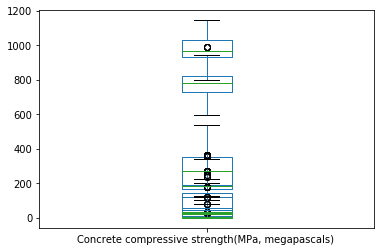

In [19]:
for colName in df.columns:
    df[colName].plot.box()

In [20]:
from scipy.stats import zscore

In [21]:
z = np.abs(zscore(df))
z

array([[2.47791782, 0.85688631, 0.84713204, ..., 1.21765845, 0.27973311,
        2.64519215],
       [2.47791782, 0.85688631, 0.84713204, ..., 1.21765845, 0.27973311,
        1.5612771 ],
       [0.49144303, 0.79553263, 0.84713204, ..., 2.24091255, 3.55306569,
        0.26660766],
       ...,
       [1.2700575 , 0.75958527, 0.85066095, ..., 0.08012724, 0.27973311,
        0.7259282 ],
       [1.16857975, 1.3080724 , 0.84713204, ..., 0.19118775, 0.27973311,
        0.18264932],
       [0.19401043, 0.30850389, 0.37696733, ..., 0.15072887, 0.27973311,
        0.20461667]])

In [22]:
threshold=3
print(np.where(z>3))

(array([  2,   3,   4,   6,  12,  17,  24,  25,  26,  30,  31,  33,  34,
        35,  41,  42,  56,  60,  61,  63,  65,  66,  76,  79,  99, 102,
       122, 125, 145, 148, 168, 171, 553, 559, 571, 584, 604, 610, 616,
       620, 622, 756, 769, 792, 798, 814, 820, 873, 936]), array([7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 1, 1, 1, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 3, 3]))


In [23]:
df1 = df[(z<3).all(axis=1)]

In [24]:
df1.shape

(981, 9)

In [25]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 981 entries, 0 to 1029
Data columns (total 9 columns):
Cement (component 1)(kg in a m^3 mixture)                981 non-null float64
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    981 non-null float64
Fly Ash (component 3)(kg in a m^3 mixture)               981 non-null float64
Water  (component 4)(kg in a m^3 mixture)                981 non-null float64
Superplasticizer (component 5)(kg in a m^3 mixture)      981 non-null float64
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     981 non-null float64
Fine Aggregate (component 7)(kg in a m^3 mixture)        981 non-null float64
Age (day)                                                981 non-null int64
Concrete compressive strength(MPa, megapascals)          981 non-null float64
dtypes: float64(8), int64(1)
memory usage: 76.6 KB


In [26]:
x1=df1.iloc[:,:-1]
print(x.shape)

y1=df1.iloc[:,-1]
print(y.shape)


(1030, 8)
(1030,)


In [27]:
x1_train,x1_test,y1_train,y1_test= train_test_split(x1,y1,test_size=.20,random_state=8)

In [28]:
x1_train.shape , y1_train.shape

((784, 8), (784,))

In [29]:
lm1 = LinearRegression()
lm1.fit(x1_train,y1_train)someNum

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [30]:
lm1.coef_ ,lm1.intercept_, lm1.score(x1_train,y1_train)

(array([ 0.11573031,  0.09876427,  0.07213222, -0.16649291,  0.32341506,
         0.01089273,  0.01258259,  0.21274738]),
 -8.285039523018249,
 0.6804291224465868)

In [31]:
predictn1  = lm1.predict(x1_test)

In [32]:
mean_squared_error(y1_test,predictn1) ,r2_score(y1_test,predictn1)

(64.43617853722468, 0.7900939333234197)

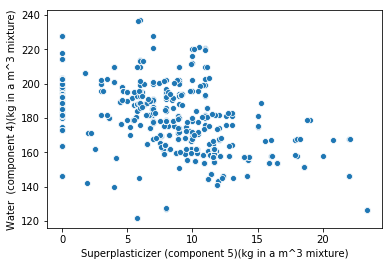

In [36]:
sns.scatterplot(x=df1['Superplasticizer (component 5)(kg in a m^3 mixture)'],
               y=df1['Water  (component 4)(kg in a m^3 mixture)'])